In [52]:
#move from google colab (original wwork due to tensor flow not working)

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
#pip install xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 

In [32]:
# Import our input dataset (red whine)
Red_df = pd.read_csv('wine_quality_Red_remove_outliers.csv')
Red_df.head()

,Unnamed: 0,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
# Clean file for ML activities (red whine)
Red_df = Red_df.drop('Wine_Type', axis=1)
Red_df.drop(Red_df.columns[Red_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Red_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1431,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1432,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1433,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
# Import our input dataset (White whine)
White_df = pd.read_csv('wine_quality_White_remove_outliers.csv')
White_df.head()

,Unnamed: 0,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [35]:
# Clean file for ML activities (White wine)
White_df = White_df.drop('Wine_Type', axis=1)
White_df.drop(Red_df.columns[Red_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
White_df

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4686,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4687,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4688,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


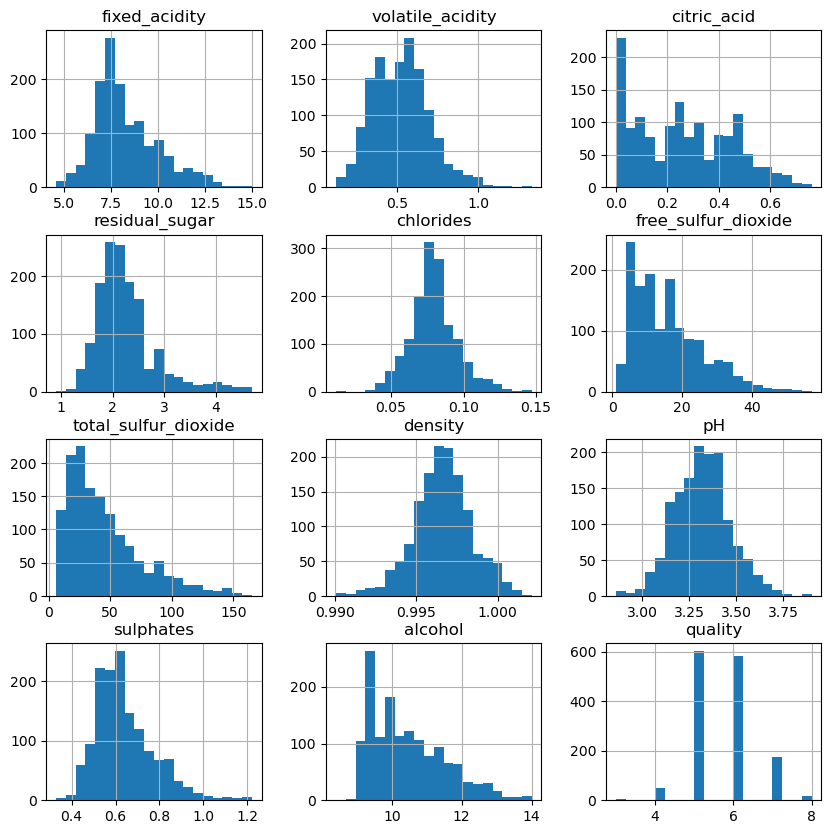

In [36]:
# Start with Red Wine

#distributions 

Red_df.hist(bins=20, figsize=(10, 10))
plt.show()

In [37]:
Red_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1435.0,8.294704,1.704257,4.60000,7.10000,7.9000,9.20000,15.0000
volatile_acidity,1435.0,0.525031,0.176757,0.12000,0.39000,0.5200,0.63000,1.3300
citric_acid,1435.0,0.261003,0.189783,0.00000,0.09000,0.2500,0.42000,0.7600
residual_sugar,1435.0,2.270662,0.593623,0.90000,1.90000,2.2000,2.50000,4.7000
chlorides,1435.0,0.079296,0.016440,0.01200,0.07000,0.0780,0.08800,0.1470
free_sulfur_dioxide,1435.0,15.668641,9.830668,1.00000,8.00000,14.0000,21.00000,57.0000
total_sulfur_dioxide,1435.0,44.933101,30.465256,6.00000,22.00000,37.0000,60.00000,165.0000
density,1435.0,0.996620,0.001801,0.99007,0.99552,0.9966,0.99774,1.0021
pH,1435.0,3.318997,0.148639,2.86000,3.22000,3.3200,3.41000,3.9000
sulphates,1435.0,0.641693,0.133479,0.33000,0.55000,0.6200,0.71000,1.2200


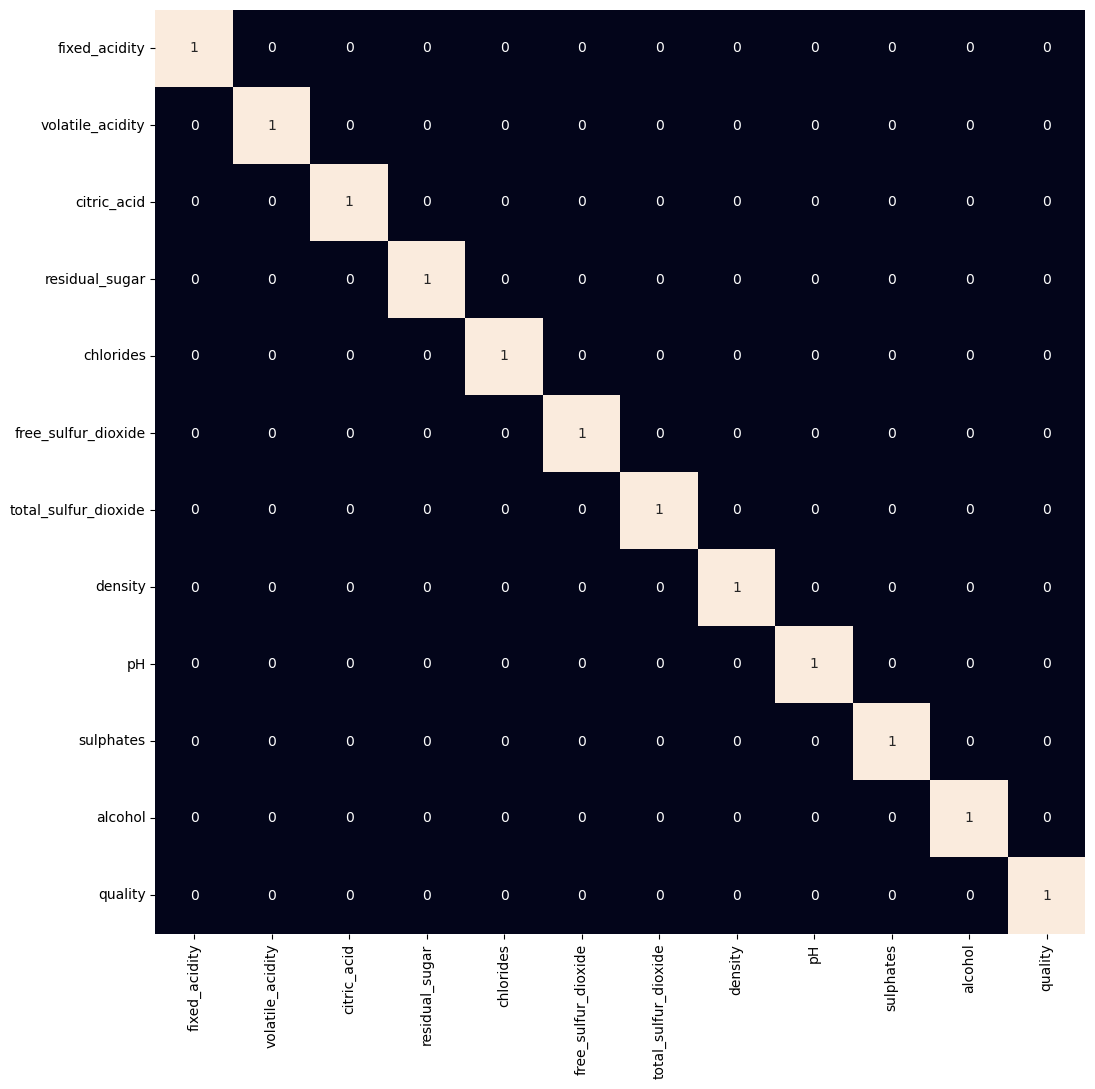

In [38]:
# Look for redundant features (corr>0.7)

plt.figure(figsize=(12, 12))
sb.heatmap(Red_df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [ ]:
# Drop columns (if necessary); redundant features

#Red_df = Red_df.drop('xxxxx', axis=1)

In [67]:
#  ***add best quality column, target best quality vs quality
# Quality data is unbalanced 
#create "best quality" >5....also try with >6 and >7 

Red_df['best quality'] = [1 if x > 5 else 0 for x in Red_df.quality]

In [68]:
#Split data into training and test/validation (80/20)


y = Red_df['best quality'] #target
X = Red_df.drop(['quality', 'best quality'], axis=1) #features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
X_train.shape, X_test.shape


((1148, 11), (287, 11))

In [69]:
# Normalize the data before training

norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#convert X_test to df for easy viewing, confirmed data from all columns scaled form 0 to 1
X_test_df = pd.DataFrame(np.squeeze(X_train))
X_test_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.432692,0.082645,0.315789,0.315789,0.492537,0.000000,0.138365,0.742311,0.528846,0.620690,0.339286
1,0.538462,0.173554,0.605263,0.263158,0.514925,0.089286,0.018868,0.516209,0.230769,0.172414,0.357143
2,0.317308,0.446281,0.000000,0.131579,0.626866,0.089286,0.044025,0.467165,0.548077,0.287356,0.196429
3,0.451923,0.214876,0.631579,0.763158,0.895522,0.035714,0.031447,0.473815,0.355769,0.275862,0.857143
4,0.490385,0.471074,0.421053,0.421053,0.567164,0.375000,0.534591,0.650873,0.413462,0.333333,0.303571
...,...,...,...,...,...,...,...,...,...,...,...
1143,0.259615,0.231405,0.394737,0.210526,0.507463,0.571429,0.459119,0.567747,0.528846,0.367816,0.196429
1144,0.259615,0.380165,0.394737,0.394737,0.462687,0.250000,0.308176,0.559435,0.576923,0.298851,0.321429
1145,0.259615,0.438017,0.000000,0.078947,0.395522,0.250000,0.094340,0.376559,0.509615,0.160920,0.285714
1146,0.298077,0.541322,0.552632,0.263158,0.597015,0.125000,0.503145,0.484622,0.355769,0.298851,0.196429


In [70]:
#look at (3) different models

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(X_train, y_train)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(X_test)))
    print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 
Training Accuracy :  0.7508442776735461
Validation Accuracy :  0.7686335403726708

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              

In [71]:
# From above LogisticalRegression and SVC classifiers both have less difference between training and validation data

In [72]:
#LogisticalRegression

print(metrics.classification_report(y_test,
                                    models[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       126
           1       0.82      0.75      0.78       161

    accuracy                           0.77       287
   macro avg       0.76      0.77      0.77       287
weighted avg       0.77      0.77      0.77       287



In [73]:
#XGBClassifier (Extreme Gradient Boosting)

print(metrics.classification_report(y_test,
                                    models[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       126
           1       0.82      0.79      0.81       161

    accuracy                           0.79       287
   macro avg       0.78      0.79      0.79       287
weighted avg       0.79      0.79      0.79       287



In [56]:
#SVC (Support Vector Classification)

print(metrics.classification_report(y_test,
                                    models[2].predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       126
           1       0.83      0.74      0.78       161

    accuracy                           0.77       287
   macro avg       0.77      0.77      0.77       287
weighted avg       0.77      0.77      0.77       287



In [74]:
# Go back and change best Quality definition >6 and >7; >5 best result

# repeat exercise for white wines 

# repeat exercise for red wines